In [70]:
# Imports
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [46]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [51]:
url = "https://raw.githubusercontent.com/rafiadabhi/MPDW/main/Pertemuan%201/Data/SM_Rata2_Mingguan_Indramayu_2014_2023.xlsx"
data = pd.read_excel(url)
data = data[['time', 'sm']]

In [52]:
data['time'] = pd.to_datetime(data['time'])
data = data.sort_values("time")

print(data.head())
print(data.info())
print(data.describe())

        time        sm
0 2014-01-05  0.396496
1 2014-01-12  0.370946
2 2014-01-19  0.395690
3 2014-01-26  0.366466
4 2014-02-02  0.379744
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    522 non-null    datetime64[ns]
 1   sm      522 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.3 KB
None
                      time          sm
count                  522  522.000000
mean   2019-01-02 12:00:00    0.318534
min    2014-01-05 00:00:00    0.151436
25%    2016-07-04 18:00:00    0.269160
50%    2019-01-02 12:00:00    0.341968
75%    2021-07-02 06:00:00    0.367484
max    2023-12-31 00:00:00    0.427325
std                    NaN    0.061585


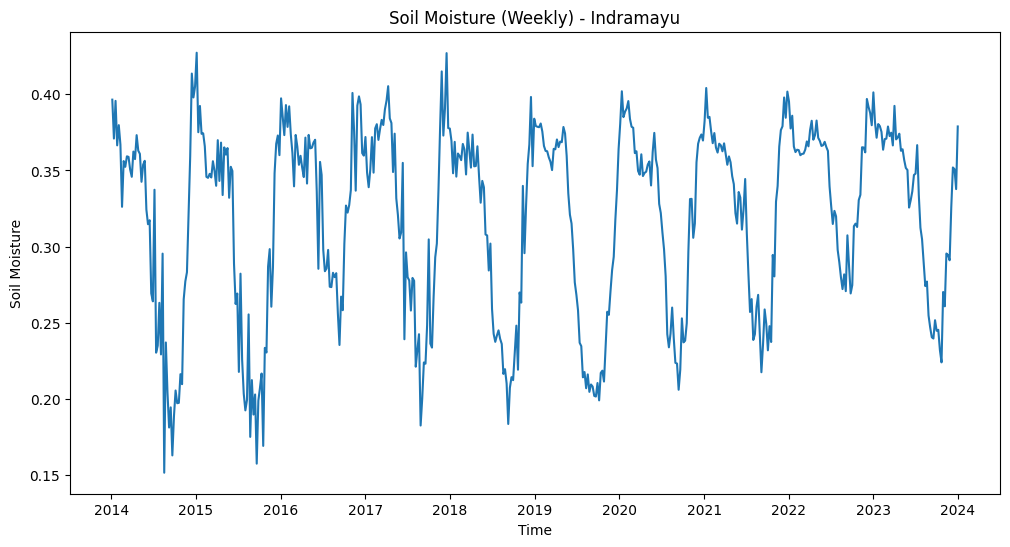

In [53]:
plt.figure(figsize=(12,6))
plt.plot(data['time'], data['sm'])
plt.title("Soil Moisture (Weekly) - Indramayu")
plt.xlabel("Time")
plt.ylabel("Soil Moisture")
plt.show()

In [54]:
dataset = data[['sm']].values
training_data_len = int(np.ceil(len(dataset) * 0.90))

In [55]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

training_data = scaled_data[:training_data_len]

In [56]:
X_train, y_train = [], []

for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [57]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(64, return_sequences=False))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
model.summary()

model.compile(optimizer="adam",
              loss="mae",
              metrics=[keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,109 (684.02 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 116,740 (456.02 KB)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.2761 - root_mean_squared_error: 0.3606
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.2749 - root_mean_squared_error: 0.3626
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.2720 - root_mean_squared_error: 0.3569
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.2798 - root_mean_squared_error: 0.3602
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.2485 - root_mean_squared_error: 0.3296
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.2619 - root_mean_squared_error: 0.3465
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.2643 - root_mean_squared_error: 0.3529
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.2832 - root_mean_squared_error: 0.3844
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.2879 - root_mean_squared_error: 0.3784
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.2624 - root_mean_squared_er

In [74]:
test_data = scaled_data[training_data_len - 60:]

X_test, y_test = [], dataset[training_data_len:]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [75]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [76]:
train = data[:training_data_len]
test = data[training_data_len:].copy()
test["Predictions"] = predictions

In [81]:
mae_train  = mean_absolute_error(y_train_eval[60:], train_predictions)
rmse_train = np.sqrt(mean_squared_error(y_train_eval[60:], train_predictions))
mape_train = mean_absolute_percentage_error(y_train_eval[60:], train_predictions) * 100
r2_train   = r2_score(y_train_eval[60:], train_predictions)

print("=== TRAIN METRICS ===")
print(f"MAE  : {mae_train:.4f}")
print(f"RMSE : {rmse_train:.4f}")
print(f"MAPE : {mape_train:.2f}%")
print(f"R²   : {r2_train:.4f}")


# === TEST METRICS ===
mae_test  = mean_absolute_error(y_test, predictions)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions))
mape_test = mean_absolute_percentage_error(y_test, predictions) * 100
r2_test   = r2_score(y_test, predictions)

print("\n=== TEST METRICS ===")
print(f"MAE  : {mae_test:.4f}")
print(f"RMSE : {rmse_test:.4f}")
print(f"MAPE : {mape_test:.2f}%")
print(f"R²   : {r2_test:.4f}")

=== TRAIN METRICS ===
MAE  : 0.0131
RMSE : 0.0185
MAPE : 4.48%
R²   : 0.9078

=== TEST METRICS ===
MAE  : 0.0110
RMSE : 0.0151
MAPE : 3.48%
R²   : 0.9101


In [79]:
train_scaled = scaled_data[:training_data_len]

X_train_eval, y_train = [], dataset[:training_data_len]

for i in range(60, len(train_scaled)):
    X_train_eval.append(train_scaled[i-60:i, 0])

X_train_eval = np.array(X_train_eval)
X_train_eval = np.reshape(X_train_eval, (X_train_eval.shape[0], X_train_eval.shape[1], 1))

train_predictions = model.predict(X_train_eval)
train_predictions = scaler.inverse_transform(train_predictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


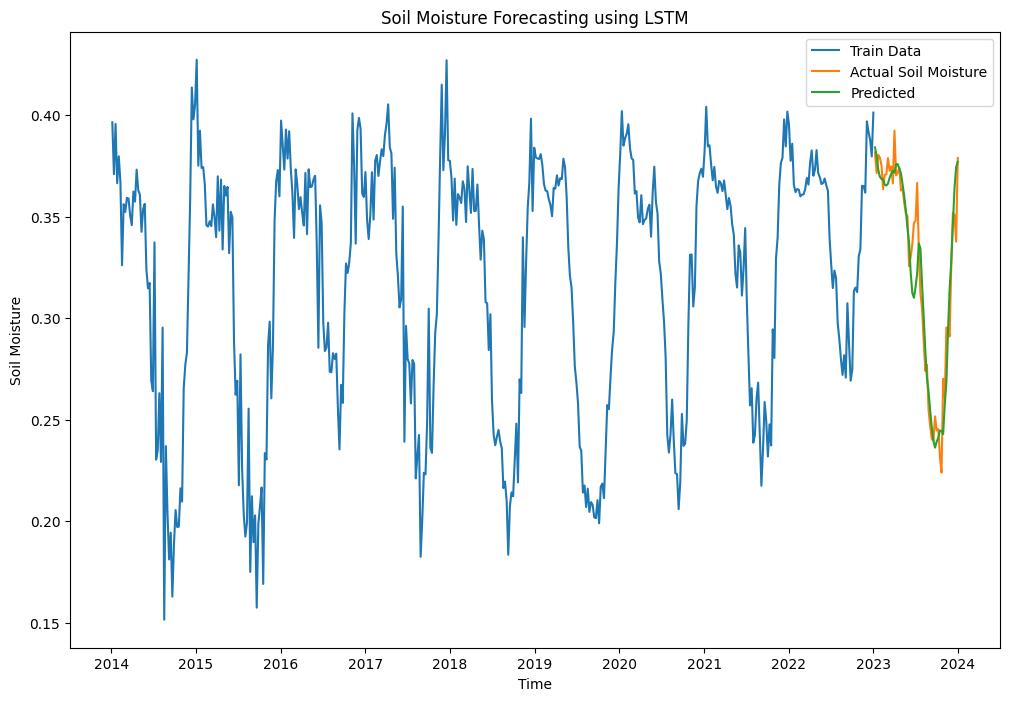

In [80]:
plt.figure(figsize=(12,8))
plt.plot(train["time"], train["sm"], label="Train Data")
plt.plot(test["time"], test["sm"], label="Actual Soil Moisture")
plt.plot(test["time"], test["Predictions"], label="Predicted")
plt.title("Soil Moisture Forecasting using LSTM")
plt.xlabel("Time")
plt.ylabel("Soil Moisture")
plt.legend()
plt.show()